## Calibration of the HYPSO-1 captures in 2024, and the one in 2025

In [1]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = ".." ## filene hentes fra en mappe over der vi er nå

### Uploading data

In [2]:
frohavet_path_24_0310 = os.path.join(dir_path, "frohavet_2024-03-10T10-15-40Z-l1a.nc")
frohavet_path_24_0310_b = os.path.join(dir_path, "frohavet_2024-03-10T10-15-40Z-l1b.nc")
frohavet_path_24_0310_c = os.path.join(dir_path, "frohavet_2024-03-10T10-15-40Z-l1c.nc")
frohavet_path_24_0310_d = os.path.join(dir_path, "frohavet_2024-03-10T10-15-40Z-l1d.nc")

satobj_h1_24_0310 = Hypso1( path = frohavet_path_24_0310, verbose = True )

l1a_cube_24_0310 = satobj_h1_24_0310.l1a_cube
l1b_cube_24_0310 = Hypso1( path = frohavet_path_24_0310_b, verbose = True )
l1c_cube_24_0310 = Hypso1( path = frohavet_path_24_0310_c, verbose = True )
l1d_cube_24_0310 = Hypso1( path = frohavet_path_24_0310_d, verbose = True )

l1c_cube_24_0310 = l1c_cube_24_0310.l1c_cube
l1b_cube_24_0310 = l1b_cube_24_0310.l1b_cube
l1d_cube_24_0310 = l1d_cube_24_0310.l1d_cube

satobj_h1_24_0310.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2024-03-10T10-15-40Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2024-03-10T10-15-40Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2024-03-10T10-15-40Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2024-03-10T10-15-40Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 430
[INFO] ADCS time range: 1710065040.000000 to 1710066000.000000
[INFO] Frame time range: 1710065740.143331 to 1710065789.893331
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computa

In [3]:
trondheim_path_24_0426 = os.path.join(dir_path, "frohavet_2024-04-26T10-49-41Z-l1a.nc")
trondheim_path_24_0426_b = os.path.join(dir_path, "frohavet_2024-04-26T10-49-41Z-l1b.nc")
trondheim_path_24_0426_c = os.path.join(dir_path, "frohavet_2024-04-26T10-49-41Z-l1c.nc")########## OBSOBSOSOSSB IKKE TRONDHIEM
trondheim_path_24_0426_d = os.path.join(dir_path, "frohavet_2024-04-26T10-49-41Z-l1d.nc")

satobj_h1_24_0426 = Hypso1( path = trondheim_path_24_0426, verbose = True )

l1a_cube_24_0426 = satobj_h1_24_0426.l1a_cube
l1b_cube_24_0426 = Hypso1( path = trondheim_path_24_0426_b, verbose = True )
l1c_cube_24_0426 = Hypso1( path = trondheim_path_24_0426_c, verbose = True )
l1d_cube_24_0426 = Hypso1( path = trondheim_path_24_0426_d, verbose = True )

l1b_cube_24_0426 = l1b_cube_24_0426.l1c_cube
l1c_cube_24_0426 = l1c_cube_24_0426.l1b_cube
l1d_cube_24_0426 = l1d_cube_24_0426.l1d_cube

satobj_h1_24_0426.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2024-04-26T10-49-41Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2024-04-26T10-49-41Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2024-04-26T10-49-41Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2024-04-26T10-49-41Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 429
[INFO] ADCS time range: 1714127940.000000 to 1714128840.000000
[INFO] Frame time range: 1714128581.185500 to 1714128630.935500
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computa

In [5]:
frohavet_path_24_0419 = os.path.join(dir_path, "frohavet_2024-04-19T10-14-21Z-l1a.nc") 
frohavet_path_24_0419_b = os.path.join(dir_path, "frohavet_2024-04-19T10-14-21Z-l1b.nc")
frohavet_path_24_0419_c = os.path.join(dir_path, "frohavet_2024-04-19T10-14-21Z-l1c.nc")
frohavet_path_24_0419_d = os.path.join(dir_path, "frohavet_2024-04-19T10-14-21Z-l1d.nc")

satobj_h1_24_0419 = Hypso1( path = frohavet_path_24_0419, verbose = True )

l1a_cube_24_0419 = satobj_h1_24_0419.l1a_cube
l1b_cube_24_0419 = Hypso1( path = frohavet_path_24_0419_b, verbose = True )
l1c_cube_24_0419 = Hypso1( path = frohavet_path_24_0419_c, verbose = True )
l1d_cube_24_0419 = Hypso1( path = frohavet_path_24_0419_d, verbose = True )

l1c_cube_24_0419 = l1c_cube_24_0419.l1c_cube
l1b_cube_24_0419 = l1b_cube_24_0419.l1b_cube
l1d_cube_24_0419 = l1d_cube_24_0419.l1d_cube

satobj_h1_24_0419.run_direct_georeferencing() # in order to get the longiyudes and latitudes

[INFO] Loading L1a capture frohavet_2024-04-19T10-14-21Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2024-04-19T10-14-21Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2024-04-19T10-14-21Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2024-04-19T10-14-21Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 431
[INFO] ADCS time range: 1713520980.000000 to 1713521940.000000
[INFO] Frame time range: 1713521661.048052 to 1713521710.798052
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computa

In [7]:
frohavet_path_24_0506 = os.path.join(dir_path, "frohavet_2024-05-06T10-17-39Z-l1a.nc") 
frohavet_path_24_0506_b = os.path.join(dir_path, "frohavet_2024-05-06T10-17-39Z-l1b.nc")
frohavet_path_24_0506_c = os.path.join(dir_path, "frohavet_2024-05-06T10-17-39Z-l1c.nc")
frohavet_path_24_0506_d = os.path.join(dir_path, "frohavet_2024-05-06T10-17-39Z-l1d.nc") 

satobj_h1_24_0506 = Hypso1( path = frohavet_path_24_0506, verbose = True )

l1a_cube_24_0506 = satobj_h1_24_0506.l1a_cube
l1b_cube_24_0506 = Hypso1( path = frohavet_path_24_0506_b, verbose = True )
l1c_cube_24_0506 = Hypso1( path = frohavet_path_24_0506_c, verbose = True )
l1d_cube_24_0506 = Hypso1( path = frohavet_path_24_0506_d, verbose = True )

l1c_cube_24_0506 = l1c_cube_24_0506.l1c_cube
l1b_cube_24_0506 = l1b_cube_24_0506.l1b_cube
l1d_cube_24_0506 = l1d_cube_24_0506.l1d_cube

satobj_h1_24_0506.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2024-05-06T10-17-39Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2024-05-06T10-17-39Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2024-05-06T10-17-39Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2024-05-06T10-17-39Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 430
[INFO] ADCS time range: 1714989960.000000 to 1714990920.000000
[INFO] Frame time range: 1714990659.158018 to 1714990708.908018
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computa

In [8]:
frohavet_path_t_24_0524 = os.path.join(dir_path, "trondheim_2024-05-24T09-50-09Z-l1a.nc")  ########## OBS OSB IKKE FROHAVET
frohavet_path_t_24_0524_b = os.path.join(dir_path, "trondheim_2024-05-24T09-50-09Z-l1b.nc")
frohavet_path_t_24_0524_c = os.path.join(dir_path, "trondheim_2024-05-24T09-50-09Z-l1c.nc")
frohavet_path_t_24_0524_d = os.path.join(dir_path, "trondheim_2024-05-24T09-50-09Z-l1d.nc") 

satobj_h1_t_24_0524 = Hypso1( path = frohavet_path_t_24_0524, verbose = True )

l1a_cube_t_24_0524 = satobj_h1_t_24_0524.l1a_cube
l1b_cube_t_24_0524 = Hypso1( path = frohavet_path_t_24_0524_b, verbose = True )
l1c_cube_t_24_0524 = Hypso1( path = frohavet_path_t_24_0524_c, verbose = True )
l1d_cube_t_24_0524 = Hypso1( path = frohavet_path_t_24_0524_d, verbose = True )

l1c_cube_t_24_0524 = l1c_cube_t_24_0524.l1c_cube
l1b_cube_t_24_0524 = l1b_cube_t_24_0524.l1b_cube
l1d_cube_t_24_0524 = l1d_cube_t_24_0524.l1d_cube

satobj_h1_t_24_0524.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture trondheim_2024-05-24T09-50-09Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture trondheim_2024-05-24T09-50-09Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture trondheim_2024-05-24T09-50-09Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture trondheim_2024-05-24T09-50-09Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 430
[INFO] ADCS time range: 1716543540.000000 to 1716544440.000000
[INFO] Frame time range: 1716544209.988926 to 1716544259.738926
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry com

In [9]:
frohavet_path_24_0615 = os.path.join(dir_path, "frohavetnorth_2024-06-15T10-48-13Z-l1a.nc")
frohavet_path_24_0615_b = os.path.join(dir_path, "frohavetnorth_2024-06-15T10-48-13Z-l1b.nc")
frohavet_path_24_0615_c = os.path.join(dir_path, "frohavetnorth_2024-06-15T10-48-13Z-l1c.nc")
frohavet_path_24_0615_d = os.path.join(dir_path, "frohavetnorth_2024-06-15T10-48-13Z-l1d.nc") 

satobj_h1_24_0615 = Hypso1( path = frohavet_path_24_0615, verbose = True )

l1a_cube_24_0615 = satobj_h1_24_0615.l1a_cube
l1b_cube_24_0615 = Hypso1( path = frohavet_path_24_0615_b, verbose = True )
l1c_cube_24_0615 = Hypso1( path = frohavet_path_24_0615_c, verbose = True )
l1d_cube_24_0615 = Hypso1( path = frohavet_path_24_0615_d, verbose = True )

l1c_cube_24_0615 = l1c_cube_24_0615.l1c_cube
l1b_cube_24_0615 = l1b_cube_24_0615.l1b_cube
l1d_cube_24_0615 = l1d_cube_24_0615.l1d_cube

satobj_h1_24_0615.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavetnorth_2024-06-15T10-48-13Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavetnorth_2024-06-15T10-48-13Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavetnorth_2024-06-15T10-48-13Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavetnorth_2024-06-15T10-48-13Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 431
[INFO] ADCS time range: 1718447820.000000 to 1718448780.000000
[INFO] Frame time range: 1718448493.783213 to 1718448543.533213
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running tr

In [10]:
frohavet_path_24_0713 = os.path.join(dir_path, "lakeanoya_2024-07-13T10-47-25Z-l1a.nc")
frohavet_path_24_0713_b = os.path.join(dir_path, "lakeanoya_2024-07-13T10-47-25Z-l1b.nc")
frohavet_path_24_0713_c = os.path.join(dir_path, "lakeanoya_2024-07-13T10-47-25Z-l1c.nc")
frohavet_path_24_0713_d = os.path.join(dir_path, "lakeanoya_2024-07-13T10-47-25Z-l1d.nc") 

satobj_h1_24_0713 = Hypso1( path = frohavet_path_24_0713, verbose = True )

l1a_cube_24_0713 = satobj_h1_24_0713.l1a_cube
l1b_cube_24_0713 = Hypso1( path = frohavet_path_24_0713_b, verbose = True )
l1c_cube_24_0713 = Hypso1( path = frohavet_path_24_0713_c, verbose = True )
l1d_cube_24_0713 = Hypso1( path = frohavet_path_24_0713_d, verbose = True )

l1c_cube_24_0713 = l1c_cube_24_0713.l1c_cube
l1b_cube_24_0713 = l1b_cube_24_0713.l1b_cube
l1d_cube_24_0713 = l1d_cube_24_0713.l1d_cube

satobj_h1_24_0713.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture lakeanoya_2024-07-13T10-47-25Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture lakeanoya_2024-07-13T10-47-25Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture lakeanoya_2024-07-13T10-47-25Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture lakeanoya_2024-07-13T10-47-25Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 430
[INFO] ADCS time range: 1720866960.000000 to 1720867920.000000
[INFO] Frame time range: 1720867645.176764 to 1720867694.926764
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry com

In [11]:
trondheim_path_t_24_0911 = os.path.join(dir_path, "trondheim_2024-09-11T11-00-43Z-l1a.nc") 
trondheim_path_t_24_0911_b = os.path.join(dir_path, "trondheim_2024-09-11T11-00-43Z-l1b.nc")
trondheim_path_t_24_0911_c = os.path.join(dir_path, "trondheim_2024-09-11T11-00-43Z-l1c.nc")
trondheim_path_t_24_0911_d = os.path.join(dir_path, "trondheim_2024-09-11T11-00-43Z-l1d.nc")

satobj_h1_t_24_0911 = Hypso1( path = trondheim_path_t_24_0911, verbose = True )

l1a_cube_t_24_0911 = satobj_h1_t_24_0911.l1a_cube
l1b_cube_t_24_0911 = Hypso1( path = trondheim_path_t_24_0911_b, verbose = True )
l1c_cube_t_24_0911 = Hypso1( path = trondheim_path_t_24_0911_c, verbose = True )
l1d_cube_t_24_0911 = Hypso1( path = trondheim_path_t_24_0911_d, verbose = True )

l1c_cube_t_24_0911 = l1c_cube_t_24_0911.l1c_cube
l1b_cube_t_24_0911 = l1b_cube_t_24_0911.l1b_cube
l1d_cube_t_24_0911 = l1d_cube_t_24_0911.l1d_cube

satobj_h1_t_24_0911.run_direct_georeferencing() # in order to get the longiyudes and latitudes

[INFO] Loading L1a capture trondheim_2024-09-11T11-00-43Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture trondheim_2024-09-11T11-00-43Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture trondheim_2024-09-11T11-00-43Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture trondheim_2024-09-11T11-00-43Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 428
[INFO] ADCS time range: 1726051800.000000 to 1726052700.000000
[INFO] Frame time range: 1726052443.722923 to 1726052493.472923
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry com

In [12]:
trondheim_path_t_24_0914 = os.path.join(dir_path, "trondheim_2024-09-14T09-42-48Z-l1a.nc") 
trondheim_path_t_24_0914_b = os.path.join(dir_path, "trondheim_2024-09-14T09-42-48Z-l1b.nc")
trondheim_path_t_24_0914_c = os.path.join(dir_path, "trondheim_2024-09-14T09-42-48Z-l1c.nc")
trondheim_path_t_24_0914_d = os.path.join(dir_path, "trondheim_2024-09-14T09-42-48Z-l1d.nc")

satobj_h1_t_24_0914 = Hypso1( path = trondheim_path_t_24_0914, verbose = True )

l1a_cube_t_24_0914 = satobj_h1_t_24_0914.l1a_cube
l1b_cube_t_24_0914 = Hypso1( path = trondheim_path_t_24_0914_b, verbose = True )
l1c_cube_t_24_0914 = Hypso1( path = trondheim_path_t_24_0914_c, verbose = True )
l1d_cube_t_24_0914 = Hypso1( path = trondheim_path_t_24_0914_d, verbose = True )

l1c_cube_t_24_0914 = l1c_cube_t_24_0914.l1c_cube
l1b_cube_t_24_0914 = l1b_cube_t_24_0914.l1b_cube
l1d_cube_t_24_0914 = l1d_cube_t_24_0914.l1d_cube

satobj_h1_t_24_0914.run_direct_georeferencing() # in order to get the longiyudes and latitudes

[INFO] Loading L1a capture trondheim_2024-09-14T09-42-48Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture trondheim_2024-09-14T09-42-48Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture trondheim_2024-09-14T09-42-48Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture trondheim_2024-09-14T09-42-48Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 429
[INFO] ADCS time range: 1726306320.000000 to 1726307220.000000
[INFO] Frame time range: 1726306968.187357 to 1726307017.937357
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry com

In [13]:
image_path_t_25_0511 = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1a.nc") 

trondheim_path_25_0511 = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1a.nc")
trondheim_path_25_0511_b = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1b.nc")
trondheim_path_25_0511_c = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1c.nc")########## OBSOBSOSOSSB IKKE TRONDHIEM
trondheim_path_25_0511_d = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1d.nc")

satobj_h1_25_0511 = Hypso1( path = trondheim_path_25_0511, verbose = True )

l1a_cube_25_0511 = satobj_h1_25_0511.l1a_cube
l1b_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_b, verbose = True )
l1c_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_c, verbose = True )
l1d_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_d, verbose = True )

l1b_cube_25_0511 = l1b_cube_25_0511.l1c_cube
l1c_cube_25_0511 = l1c_cube_25_0511.l1b_cube
l1d_cube_25_0511 = l1d_cube_25_0511.l1d_cube

satobj_h1_25_0511.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 431
[INFO] ADCS time range: 1746957180.000000 to 1746958140.000000
[INFO] Frame time range: 1746957867.923740 to 1746957917.673740
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

### General calibration data

In [16]:
calibration_lat = [63.642540, 63.642540, 63.642540, 63.642540] ##
calibration_long = [9.503311, 9.503311, 9.503311, 9.503311]

### Calibration 10.03.2024

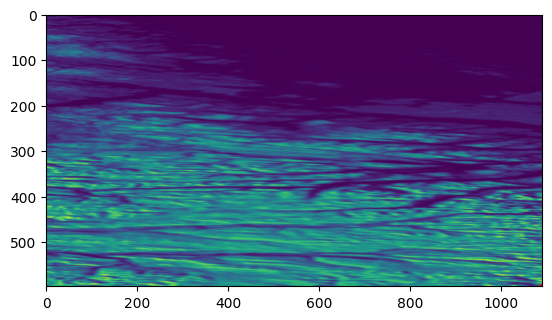

In [19]:
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_24_0310.latitudes, satobj_h1_24_0310.longitudes) #from file funcions_autonom.py

plt.imshow(l1d_cube_24_0310[:,:, 100], origin='upper')
plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=10)

### Calibration 19.04.2024

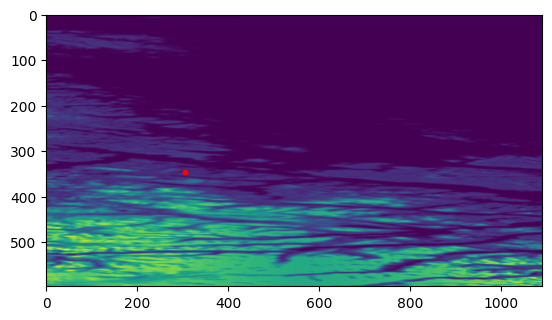

In [20]:
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_24_0419.latitudes, satobj_h1_24_0419.longitudes) #from file funcions_autonom.py

plt.imshow(l1d_cube_24_0419[:,:, 100], origin='upper')
plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=10)

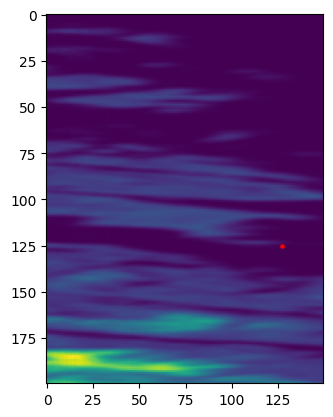

In [29]:
i_start, i_end = 200, 400
j_start, j_end = 250, 400

calibration_x = 72
calibration_y = -20
cropped = l1d_cube_24_0419[i_start:i_end, j_start:j_end, 100]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_24_0419.latitudes, satobj_h1_24_0419.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

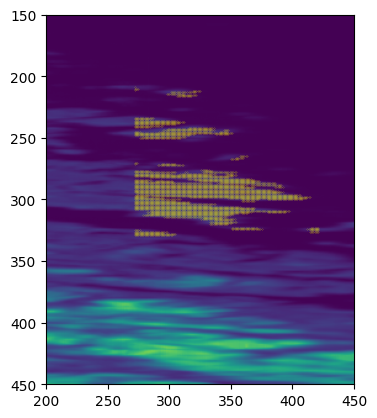

In [30]:
plt.imshow(l1d_cube_24_0419[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end -50 ):
    for j in range(j_start - 50 , j_end- 50):
        if globe.is_land(satobj_h1_24_0419.latitudes[i][j], satobj_h1_24_0419.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=0.01)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(j_start - 50, j_end + 50 )
plt.ylim(i_end + 50, i_start - 50)  # Y is inverted by default

plt.show()

### Calibration 26.04.2025

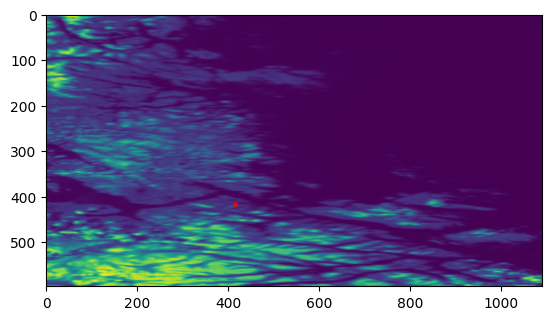

In [31]:
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_24_0426.latitudes, satobj_h1_24_0426.longitudes) #from file funcions_autonom.py

plt.imshow(l1d_cube_24_0426[:,:, 100], origin='upper')
plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=5)

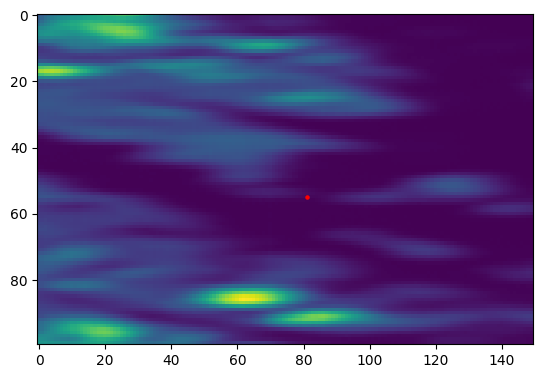

In [48]:
i_start, i_end = 350, 450
j_start, j_end = 400, 550

calibration_x = 66
calibration_y = -12
cropped = l1d_cube_24_0426[i_start:i_end, j_start:j_end, 100]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_24_0426.latitudes, satobj_h1_24_0426.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

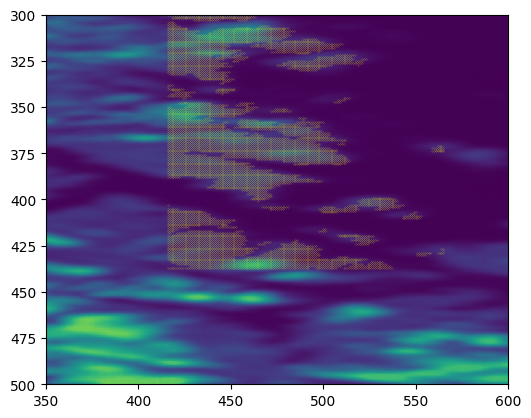

In [49]:
plt.imshow(l1d_cube_24_0426[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end ):
    for j in range(j_start - 50 , j_end - 50):
        if globe.is_land(satobj_h1_24_0426.latitudes[i][j], satobj_h1_24_0426.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=0.01)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(j_start - 50, j_end + 50 )
plt.ylim(i_end + 50, i_start - 50)  # Y is inverted by default

plt.show()

### Calibration 06.05.2024

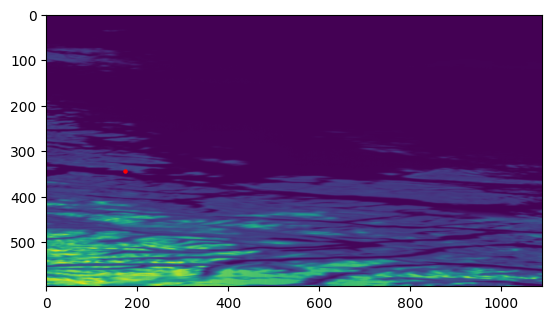

In [51]:
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_24_0506.latitudes, satobj_h1_24_0506.longitudes) #from file funcions_autonom.py

plt.imshow(l1d_cube_24_0506[:,:, 100], origin='upper')
plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=5)

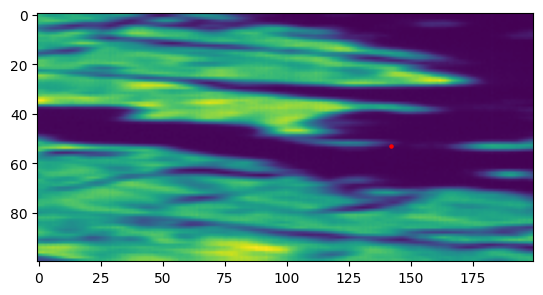

In [64]:
i_start, i_end = 300, 400
j_start, j_end = 100, 300

calibration_x = 69
calibration_y = 9
cropped = l1d_cube_24_0506[i_start:i_end, j_start:j_end, 100]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_24_0506.latitudes, satobj_h1_24_0506.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

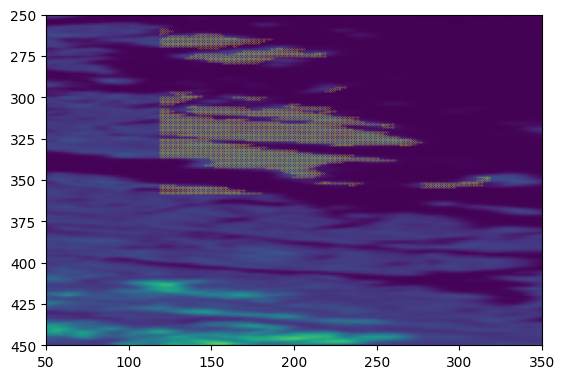

In [62]:
plt.imshow(l1d_cube_24_0506[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end -50 ):
    for j in range(j_start - 50 , j_end- 50):
        if globe.is_land(satobj_h1_24_0506.latitudes[i][j], satobj_h1_24_0506.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=0.01)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(j_start - 50, j_end + 50 )
plt.ylim(i_end + 50, i_start - 50)  # Y is inverted by default

plt.show()

### Calibration 24.05.2024

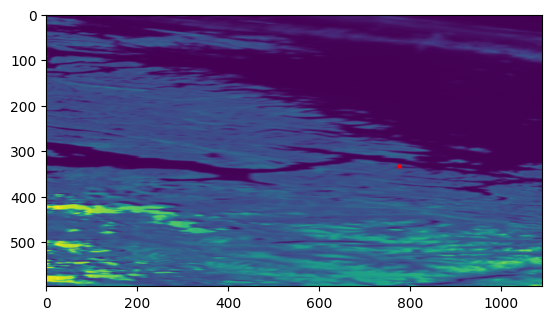

In [63]:
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_t_24_0524.latitudes, satobj_h1_t_24_0524.longitudes) #from file funcions_autonom.py

plt.imshow(l1d_cube_t_24_0524[:,:, 100], origin='upper')
plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=5)

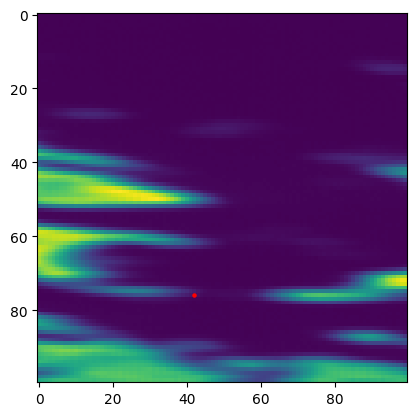

In [78]:
i_start, i_end = 250, 350
j_start, j_end = 800, 900

calibration_x = 66
calibration_y = -6
cropped = l1d_cube_t_24_0524[i_start:i_end, j_start:j_end, 100]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_t_24_0524.latitudes, satobj_h1_t_24_0524.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

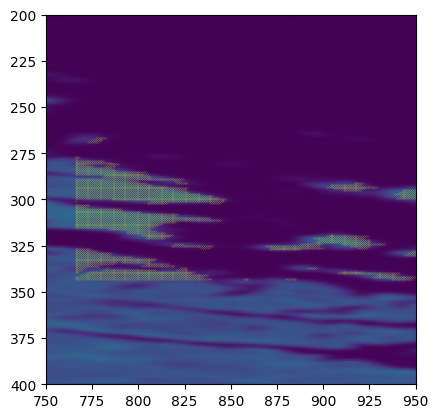

In [79]:
plt.imshow(l1d_cube_t_24_0524[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end ):
    for j in range(j_start - 100 , j_end):
        if globe.is_land(satobj_h1_t_24_0524.latitudes[i][j], satobj_h1_t_24_0524.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=0.01)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(j_start - 50, j_end + 50 )
plt.ylim(i_end + 50, i_start - 50)  # Y is inverted by default

plt.show()

### Calibration 15.06.2024

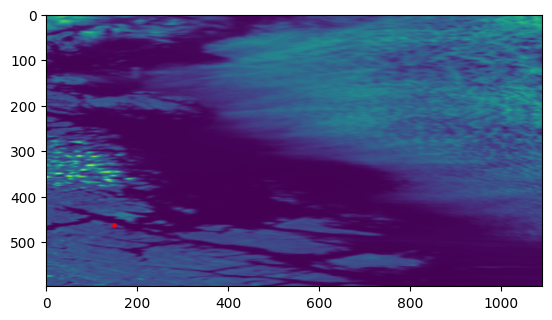

In [80]:
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long,satobj_h1_24_0615.latitudes,satobj_h1_24_0615.longitudes) #from file funcions_autonom.py

plt.imshow(l1d_cube_24_0615[:,:, 100], origin='upper')
plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=5)

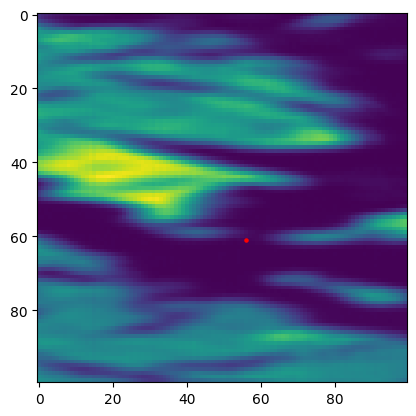

In [89]:
i_start, i_end = 400, 500
j_start, j_end = 150, 250

calibration_x = 58
calibration_y = -2
cropped = l1d_cube_24_0615[i_start:i_end, j_start:j_end, 100]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_24_0615.latitudes, satobj_h1_24_0615.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

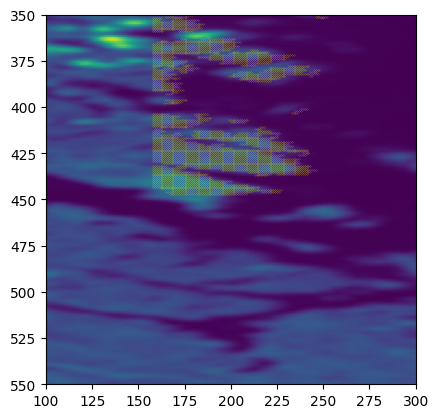

In [90]:
plt.imshow(l1d_cube_24_0615[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end -50 ):
    for j in range(j_start - 50 , j_end- 50):
        if globe.is_land(satobj_h1_24_0615.latitudes[i][j], satobj_h1_24_0615.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=0.01)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(j_start - 50, j_end + 50 )
plt.ylim(i_end + 50, i_start - 50)  # Y is inverted by default

plt.show()

### Calibration 13.07.2024

### Calibration 11.09.2024

### Calibration 14.09.2024

### Calibration 11.05.2025